<a href="https://colab.research.google.com/github/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/notebooks/brand_analysis_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/datacamp/r-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Brand Analysis Using Social Media Data in R**

Welcome to this hands-on training where you will learn how to perform brand analysis from social media data using R. We will be using different R libraries to analyze twitter data and derive insights.

In this session, you will learn

* How to compare brand popularity by extracting and comparing follower counts
* How to promote a brand by identifying popular tweets
* How to evaluate brand salience and compare the same for two brands using tweet frequencies
* Understand brand perception through text mining and by visualizing key terms
* Perform sentiment analysis to understand customer's feelings and sentiments about a brand
* Visualize brand presence by plotting tweets on the map

## **The Dataset**

The datasets to be used in this training session are in CSV format. These datasets comprise extracted live tweets using `rtweet` library. The datasets are:
* **users_twts.csv**: User data of four twitter accounts pre-extracted from Twitter
* **tesladf.csv**: Tweets searched on keyword 'tesla' pre-extracted from Twitter
* **toyotadf.csv**: Tweets searched on keyword 'toyota' pre-extracted from Twitter
* **tesla_small.csv**: Tweets searched on keyword 'tesla' pre-extracted from Twitter. This is a smaller dataset with fewer tweets.

* **tweets_car.csv**: Tweets searched on keyword 'electric car' pre-extracted from Twitter

Note that we will not be extracting live tweets from Twitter during this session as it invovles a setup process. We will be using pre-extracted tweets saved in RDS format.

- **users_twts.csv**: has 4 records and 90 columns of user data and associated metadata
- **tesladf.csv**: has 17979 records (tweets) and 90 columns of tweet text and associated metadata
- **toyotadf.csv**: has 17798 records (tweets) and 90 columns of tweet text and associated metadata
- **tesla_small.csv**: has 500 records (tweets) and 90 columns of tweet text and associated metadata
- **tweets_car.csv**: has 12925 records (tweets) and 90 columns of tweet text and associated metadata

All the datasets have the same set of columns and some of the important columns that we will work with are listed below:

- `user_id`: Twitter allocated unique ID for each twitter user.
- `created_at`: UTC time when this Tweet was created
- `screen_name`: The screen name or twitter handle that an user identifies themselves with
`text`: The actual tweet text posted by an user
- `retweet_count`: Number of times a given tweet has been retweeted.
- `followers_count`: The number of followers a twitter account currently has.
- `geo_coords`, `coords_coords`, `bbox_coords`: Represents geographic location of a tweet as reported by the user or client application


## **Getting started and exploring the dataset**

In [0]:
# Install R packages
install.packages('rtweet')
install.packages('dplyr')
install.packages('reshape')
install.packages('ggplot2')
install.packages('qdapRegex')
install.packages('tm')
install.packages('qdap')
install.packages('wordcloud')
install.packages('RColorBrewer')
install.packages('syuzhet')
install.packages('maps')

In [0]:
# Load rtweet library
library(rtweet)

## 1. Compare brand popularity by extracting and comparing follower counts

We can compare followers count for competing products by using their screen names and follower counts.

Note:
- `screen_name`: The screen name or twitter handle that an user identifies themselves with
- `followers_count`: The number of followers a twitter account currently has.

The followers count for a twitter account indicates the popularity of that account and is a measure of social media influence.

Create a list of users that is comprised of twitter accounts of four auto magazines.  

In [3]:
# Create a variable to store twitter account names of 4 auto magazines
users <- c("caranddriver", "motortrend", "autoweekUSA", "roadandtrack")
users

[1] "caranddriver" "motortrend"   "autoweekUSA"  "roadandtrack"

Extract user data for the 4 twitter accounts using `lookup_users()`. 

The `lookup_users()` function takes screen names as input and extracts user data for twitter accounts. 

Note: We will not be executing this function now in live environment and instead will load a CSV file pre-saved with extracted user data.

In [0]:
# Extract user data for the twitter accounts stored in users
# users_twts <- lookup_users(users)

# Save extracted data a CSV file using fwrite from data.table library
#fwrite(users_twts, file = "users_twts.csv")

Import the pre-saved CSV file with extracted user data for the four twitter accounts


---



In [0]:
# Import extracted user data from the csv file into a dataframe
users_twts = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/users_twts.csv?raw=true")

In [6]:
# View dimensions of the dataframe
dim(users_twts)

# View few rows of the dataframe
head(users_twts)

[1]  4 90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,14342661,1.272359e+18,2020-06-15T02:45:02Z,CARandDRIVER,1000-hp Hellephant-powered @Dodge Demon rolls onto dyno in video: https://t.co/fj18FvEVBl https://t.co/XyIngamybg,SocialFlow,NA,NA,NA,NA,⋯,33485,3666,2008-04-09T15:39:55Z,TRUE,http://t.co/uMTUR3UJQh,http://www.caranddriver.com,NA,https://pbs.twimg.com/profile_banners/14342661/1589386475,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/905461745178816514/goEtq5xZ_normal.jpg
2,25383000,1.271872e+18,2020-06-13T18:27:21Z,MotorTrend,Today is the day! Lights are green for the @24hoursoflemans Virtual! 🏁 🏎 Get all the LIVE coverage right here! https://t.co/GE6bAEbN3R,Twitter for iPhone,NA,NA,NA,NA,⋯,41567,2914,2009-03-19T20:53:09Z,TRUE,,,NA,https://pbs.twimg.com/profile_banners/25383000/1591290185,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1268290610642841606/tmgqtz8r_normal.jpg
3,72861485,1.272401e+18,2020-06-15T05:32:05Z,AutoweekUSA,Ford switched from Tremec to Getrag for its Mustang manual transmissions back in 2011; a new class action lawsuit c… https://t.co/8U1LTxJA8X,SocialFlow,NA,NA,NA,NA,⋯,42962,907,2009-09-09T14:14:49Z,TRUE,https://t.co/vmRBIAd2qP,http://www.autoweek.com,NA,https://pbs.twimg.com/profile_banners/72861485/1576699667,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1207392025269719041/hLqoPr0A_normal.jpg
4,21200953,1.272220e+18,2020-06-14T17:31:06Z,RoadandTrack,Watch a bunch of Safari 911s frolic through the snow on a frozen lake. https://t.co/6WacyUrnzW https://t.co/tfUAvfe0J7,SocialFlow,NA,NA,NA,NA,⋯,45268,468,2009-02-18T14:38:00Z,TRUE,http://t.co/MOF3c631Tk,http://www.roadandtrack.com,NA,https://pbs.twimg.com/profile_banners/21200953/1544480352,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/845016711292071936/ZqE0j-8u_normal.jpg


From the user data, extract details of screen names and follower counts for the 4 twitter accounts into a dataframe.

In [0]:
# Create a data frame of screen names and followers count
user_df <- users_twts[,c("screen_name","followers_count")]

In [8]:
# Display and compare the follower counts for the 4 twitter accounts
user_df

screen_name,followers_count
<fct>,<int>
CARandDRIVER,1089921
MotorTrend,739800
AutoweekUSA,164567
RoadandTrack,659062


We can see that "Car and Driver" is the most popular automobile magazine with number of followers exceeding a million and it is followed by "Motor Trends" with 739,800 followers. 

An automobile brand advertising for a new model can place its adverts on the homepage of these twitter acocunts or tag these twitter accounts while promoting its brand. 

Thus, Digital marketers can position ads on popular twitter accounts for increased visibility.

## 2. Promote a brand by identifying popular tweets using retweet counts

A retweet is a tweet re-shared by another user. A retweet helps utilize existing content to build a following for your brand.


The `retweet_count` column stores the number of retweets received for an original post.

The number of times a twitter text is retweeted indicates what is trending. The inputs gathered can be leveraged by promoting your brand using the popular retweets.


Let's identify the most popular tweets on Tesla based on the number of retweets received.

`search_tweets()`is a powerful function for extracting tweets based on keywords. 

We are going to use pre-extracted tweets on `tesla`, saved in CSV format, for this exercise. The steps for extracting tweets using `search_tweets()` and saving to CSV file are given below for reference. 

Note: We will not be executing this function now in live environment.

In [0]:
# Extract 18000 tweets on Tesla
#tweets_tesla = search_tweets("tesla", n = 18000, lang = "en", include_rts = FALSE)
#fwrite(tweets_tesla, "tesladf.csv")

Import the pre-saved CSV file with extracted tweets data on `tesla`

In [0]:
# Import extracted tweets in CSV format into a dataframe
tesladf = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/tesladf.csv?raw=true")

In [11]:
# Explore the tweet dataframe
dim(tesladf)
head(tesladf)

[1] 17979    90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,1.016807e+18,1.262241e+18,2020-05-18T04:36:31Z,1LoafOfMeat,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,Twitter for Android,73,1.262107e+18,9.889751e+17,BLKMDL3,⋯,433,8164,2018-07-10T22:10:02Z,FALSE,,,NA,,,http://pbs.twimg.com/profile_images/1104867316322521091/2n_rsTF1_normal.jpg
2,1.198000e+18,1.262241e+18,2020-05-18T04:36:17Z,2beaux,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",Twitter for iPad,149,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
3,1.198000e+18,1.262240e+18,2020-05-18T04:32:08Z,2beaux,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",Twitter for iPad,277,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
4,1.198000e+18,1.262218e+18,2020-05-18T03:04:49Z,2beaux,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",Twitter for iPad,214,1.262217e+18,2.323148e+09,Miss_Violet2014,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
5,1.198000e+18,1.262163e+18,2020-05-17T23:28:26Z,2beaux,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",Twitter for iPad,186,1.262131e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
6,1.198000e+18,1.262198e+18,2020-05-18T01:47:00Z,2beaux,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,Twitter for iPad,199,1.262198e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg


Extract the columns `retweet_count` and `text` and save to a new dataframe

In [12]:
# Create a data frame of tweet text and retweet count
rtwt <- tesladf[,c("text", "retweet_count")]

# View few rows of the new dataframe
head(rtwt)

,text,retweet_count
,<fct>,<int>
1,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,0
2,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",0
3,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",0
4,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",0
5,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",0
6,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,0


Sort in descending order of the retweet counts using `arrange()` from `dplyr` library

In [13]:
# Import library
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [14]:
# Sort data frame based on descending order of retweet counts
rtwt_sort <- arrange(rtwt, desc(retweet_count))

# View sorted output
head(rtwt_sort)

,text,retweet_count
,<fct>,<int>
1,Year these companies were founded: 2021: Hope your company 2011: Zoom 2009: Uber 2008: Airbnb 2006: Spotify 2006: Twitter 2004: Facebook 2003: Tesla 2002: SpaceX 1999: Alibaba 1998: Google 1997: Netflix 1994: Amazon 1976: Apple 1975: Microsoft 1946: Sony 1938: Samsung @ Jon E,1165
2,"All of a sudden, I think I want a Tesla. https://t.co/UFxfyQOJ8s",495
3,Elon Wins: California Will Allow Tesla Plant To Reopen With ‘Safety Precautions’ https://t.co/7XHKXKgBXM,480
4,"If you're a @Tesla worker, we'd love to chat. https://t.co/Lf27lBIHxw https://t.co/zEKICOaNaN",456
5,Tesla's Next Factory Is Going To Be In Austin Texas And It's Going To Happen Quickly 👏👏👏👏👏 To Much Trouble With Local California Government 🔥🔥🔥🔥🔥 https://t.co/qGTRo7l7ID,420
6,"This is the protest today at the Tesla plant in Fremont, Ca. These leftists want Elon Musk put behind bars for reopening. My God look at this massive crowd! 😂😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/DhKJZbBehB",361


The `text` column usually contains duplicate tweets. We can retain just one version of such tweets by applying the `unique()` function on the `text` column.

This function takes two arguments:the data frame and the column `text` for removing duplicate tweets.

In [0]:
# Exclude rows with duplicate text from sorted data frame
rtwt_unique <- unique(rtwt_sort, by = "text")

View the top 6 unique tweets that got the most number of retweets according to the retweets count

In [16]:
# Print top 6 unique posts retweeted most number of times
head(rtwt_unique)

,text,retweet_count
,<fct>,<int>
1,Year these companies were founded: 2021: Hope your company 2011: Zoom 2009: Uber 2008: Airbnb 2006: Spotify 2006: Twitter 2004: Facebook 2003: Tesla 2002: SpaceX 1999: Alibaba 1998: Google 1997: Netflix 1994: Amazon 1976: Apple 1975: Microsoft 1946: Sony 1938: Samsung @ Jon E,1165
2,"All of a sudden, I think I want a Tesla. https://t.co/UFxfyQOJ8s",495
3,Elon Wins: California Will Allow Tesla Plant To Reopen With ‘Safety Precautions’ https://t.co/7XHKXKgBXM,480
4,"If you're a @Tesla worker, we'd love to chat. https://t.co/Lf27lBIHxw https://t.co/zEKICOaNaN",456
5,Tesla's Next Factory Is Going To Be In Austin Texas And It's Going To Happen Quickly 👏👏👏👏👏 To Much Trouble With Local California Government 🔥🔥🔥🔥🔥 https://t.co/qGTRo7l7ID,420
6,"This is the protest today at the Tesla plant in Fremont, Ca. These leftists want Elon Musk put behind bars for reopening. My God look at this massive crowd! 😂😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/DhKJZbBehB",361


The most retweeted texts have popular quotes such as "I think I want a Tesla", indicating the loyalty of Tesla fans. 

These tweets can be used for promoting Tesla's models and brand loyalty.

### 3.	Evaluate brand salience and compare the same for two brands using tweet frequencies


Brand salience is the extent to which a brand is spoken about for which volume of tweets posted is a strong indicator.

In this exercise, we will evalute the brand salience for Tesla by analyzing twitter data over time, popularly known as time series data analysis. 

We will also compare brand salience of Tesla against one of its competing brands, Toyota.


#### 3a) Visualizing frequency of tweets using time series plots

Time series represents a series of data points sequentially indexed over time. 
Analyzing time series data helps visualize the frequency of tweets over time.

Twitter data can help monitor engagement for a product, indicating levels of interest. Visualizing tweet frequency provides insights into this interest level.

Let's visualize tweet frequency on the automobile brand "Tesla". We will be using the tweet dataframe created for Tesla in the previous exercise.


In [0]:
# View the tweet dataframe
head(tesladf)

We see that the `created_at` column has the timestamp of created time of tweets in the output.

A time series plot is used to visualize the tweet frequencies over time. 

To create a time series plot, we use `ts_plot()` from the `rtweet` library which takes 3 arguments:
the tweets data frame, the by argument to specify the time interval, and the color of the line plot.

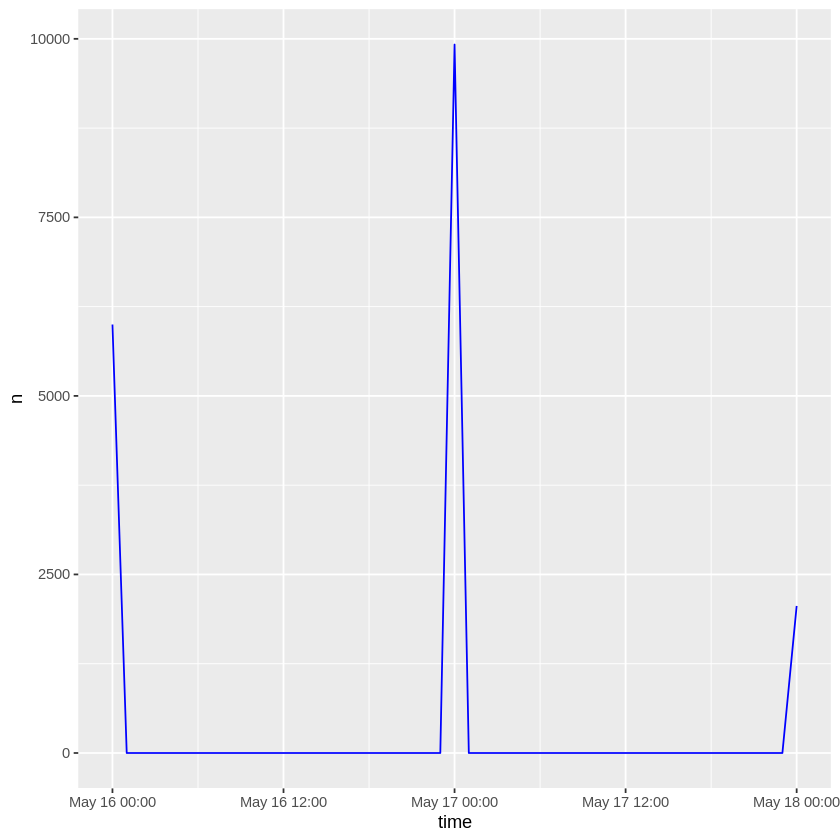

In [0]:
# Create a time series plot
ts_plot(tesladf, by = "hours", color = "blue")

#### 3b) Compare brand salience for two brands using time series plots and tweet frequencies

The volume of tweets posted for a product is a strong indicator of its brand salience. 

Now, lets compare the brand salience of Tesla and Camry using time series objects and plots.


In [0]:
## Extract tweets for Toyota

#tweets_toyo = search_tweets("toyota", n = 18000, lang = "en", include_rts = FALSE)

#fwrite(tweets_toyo, file = "toyotadf.csv")


Import the pre-saved CSV file with extracted tweets data on `toyota`

In [0]:
# Import extracted tweets in CSV format into a dataframe
toyotadf = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/toyotadf.csv?raw=true")


In [25]:
# Explore the tweet dataframe for toyota
dim(toyotadf)
head(toyotadf)

[1] 17798    90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,2.914718e+07,1.26e+18,2020-05-18T05:09:56Z,LowyatNET,#Toyota Launches Its Flagship Store On @LazadaMY ; Bookings Done Via App https://t.co/X5HTc6DFx8 https://t.co/sEcdqa4K6w,TweetDeck,97,NA,NA,,⋯,46053,828,2009-04-06T04:58:33Z,TRUE,https://t.co/74yFDctZGp,http://www.lowyat.net,NA,https://pbs.twimg.com/profile_banners/29147175/1489395700,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/841210781177802752/VD5lHJw__normal.jpg
2,5.168350e+08,1.26e+18,2020-05-18T05:08:31Z,RonaldoPardede,"* RULES: * ALL WIVES OF MINE CAN START MARKETING ""SUZUKI"", MOTORS &amp; CARS, &amp; ""SUBARU"", CARS, &amp; ""ISUZU"", MOTORS &amp; CARS, &amp; ""TOYOTA"", CARS, &amp; ""HONDA"", MOTORS &amp; CARS, TO KARYS YOSEF &amp; SANTO PETRUS PEOPLE...LOVE YOU WIVES FOREVER...",Twitter for Android,258,1.26e+18,5.168350e+08,RonaldoPardede,⋯,49118,46675,2012-03-06T19:57:25Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/516834962/1563001412,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1145742955065380867/HY4X3hWE_normal.png
3,5.168350e+08,1.26e+18,2020-05-13T09:53:36Z,RonaldoPardede,"* NY. SHUI SUI PARDEDE ONE (150 CM), ""CMO"" CHIEF MARKETING OFFICER, CAN TALK TO INSURANCE COMPANY ""AIA"" OR TO CARS COMPANIES ""FORD"" &amp; ""LINCOLN"" &amp; ""HONDA"" &amp; ""TOYOTA"" FOR MARKETING OUR PRODUCTS...WE CAN HAVE BONUS &amp; PAYCHECKS &amp; SERVICE FEES FOR MARKETING OUR COMPANIES' PRODUCTS.",Twitter for Android,297,1.26e+18,5.168350e+08,RonaldoPardede,⋯,49118,46675,2012-03-06T19:57:25Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/516834962/1563001412,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1145742955065380867/HY4X3hWE_normal.png
4,3.266185e+09,1.26e+18,2020-05-18T05:08:04Z,DaOtherShip,@StillJustDave You going to start charging Toyota rent for living in your head like that? 😂😂,Twitter for iPhone,77,1.26e+18,1.220000e+18,StillJustDave,⋯,15957,95015,2015-07-02T16:59:08Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/3266185284/1453081985,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1224826150146449408/G-LTikOh_normal.jpg
5,1.050000e+18,1.26e+18,2020-05-18T05:07:59Z,itsvantime,"@Twonius I dunno, though I think it’ll be hard to top the styling of the outgoing generation (pre-facelifts), some of Toyota’s bread and butter has been looking pretty decent lately (new Highlander), so there’s some hope...",Twitter for iPhone,214,1.26e+18,9.931703e+08,Twonius,⋯,14144,17312,2018-10-18T19:11:40Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1053000678870663168/1539890325,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1152119259570397185/anSvc_gr_normal.jpg
6,1.050000e+18,1.26e+18,2020-05-17T19:34:43Z,itsvantime,New Sienna tomorrow (we guess that leaked slide was on the money. Now... will there be a Sienna Prime? Hope so!) https://t.co/AaSuJe44e8,Twitter for iPhone,112,NA,NA,,⋯,14144,17312,2018-10-18T19:11:40Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1053000678870663168/1539890325,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1152119259570397185/anSvc_gr_normal.jpg


We can see the extracted tweets on `toyota` and the `created_at` column has the timestamp


A time series object contains the aggregated frequency of tweets over a specified time interval. Creating time series objects is the first step before visualizing tweet frequencies for comparison. 

We create time series object for Tesla using the `ts_data()` function. The output from this function has two columns comprising time and tweet frequencies.


In [22]:
# Create a time series object for Tesla at hourly intervals
tesla_ts <- ts_data(tesladf, by ='hours')

# View the time series object
tesla_ts

time,n
<dttm>,<int>
2020-05-16 00:00:00,6000
2020-05-16 01:00:00,0
2020-05-16 02:00:00,0
2020-05-16 03:00:00,0
2020-05-16 04:00:00,0
2020-05-16 05:00:00,0
2020-05-16 06:00:00,0
2020-05-16 07:00:00,0
2020-05-16 08:00:00,0


In [26]:
# Rename the two columns in the time series object
names(tesla_ts) <- c("time", "tesla_n")

# View the output
head(tesla_ts)

time,tesla_n
<dttm>,<int>
2020-05-16 00:00:00,6000
2020-05-16 01:00:00,0
2020-05-16 02:00:00,0
2020-05-16 03:00:00,0
2020-05-16 04:00:00,0
2020-05-16 05:00:00,0


We can see the column with the hourly time intervals is now named as `time` and the corresponding aggregated tweet counts as `tesla_n`

Create a similar time series object for Toyota and rename the two columns

In [27]:
# Create a time series object for Toyota at hourly intervals
toyo_ts <- ts_data(toyotadf, by ='hours')

# Rename the two columns in the time series object
names(toyo_ts) <- c("time", "toyo_n")

# View the output
head(toyo_ts)

time,toyo_n
<dttm>,<int>
2020-05-12 00:00:00,3018
2020-05-12 01:00:00,0
2020-05-12 02:00:00,0
2020-05-12 03:00:00,0
2020-05-12 04:00:00,0
2020-05-12 05:00:00,0


We now have two time series objects with columns for time and tweet frequencies.

Merge the objects into a single data frame using the `merge()` function which is from the `reshape` library.

In [28]:
# Load the required libraries
library(reshape)
library(ggplot2)


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




The `merge()` function takes 3 arguments:

the time series objects to be merged, 

`by` argument which specifies the common column for merging,

`all` argument to instruct whether all the rows should be included.

In [0]:
# Merge the time series objects with "time" as the common column
merged_df <- merge(tesla_ts, toyo_ts, by = "time", all = TRUE)

# View few rows of the merged dataframe
head(merged_df)

,time,tesla_n,toyo_n
,<dttm>,<int>,<int>
1,2020-05-12 00:00:00,NA,3018
2,2020-05-12 01:00:00,NA,0
3,2020-05-12 02:00:00,NA,0
4,2020-05-12 03:00:00,NA,0
5,2020-05-12 04:00:00,NA,0
6,2020-05-12 05:00:00,NA,0


We can see the tweet frqeuencies for tesla and toyota in separate columns.

Stack the tweet frequency counts into a single column and brands into another column using `melt()` from 'reshape` library.

The melt() function takes 3 arguments:

the dataframe to melt, `na.rm` to specify whether to include or exclude rows with missing values and `id.vars` to specify the source columns to be retained (`time` in this case).

In [0]:
# Stack the tweet frequency columns
melt_df <- melt(merged_df, na.rm = TRUE, id.vars = "time")

# View the output
head(melt_df)

,time,variable,value
,<dttm>,<fct>,<int>
1,2020-05-16 00:00:00,tesla_n,6000
2,2020-05-16 01:00:00,tesla_n,0
3,2020-05-16 02:00:00,tesla_n,0
4,2020-05-16 03:00:00,tesla_n,0
5,2020-05-16 04:00:00,tesla_n,0
6,2020-05-16 05:00:00,tesla_n,0


We can see that all columns other than `time` have been stacked and we have three columns now: `time`, `variable`, `value`. 

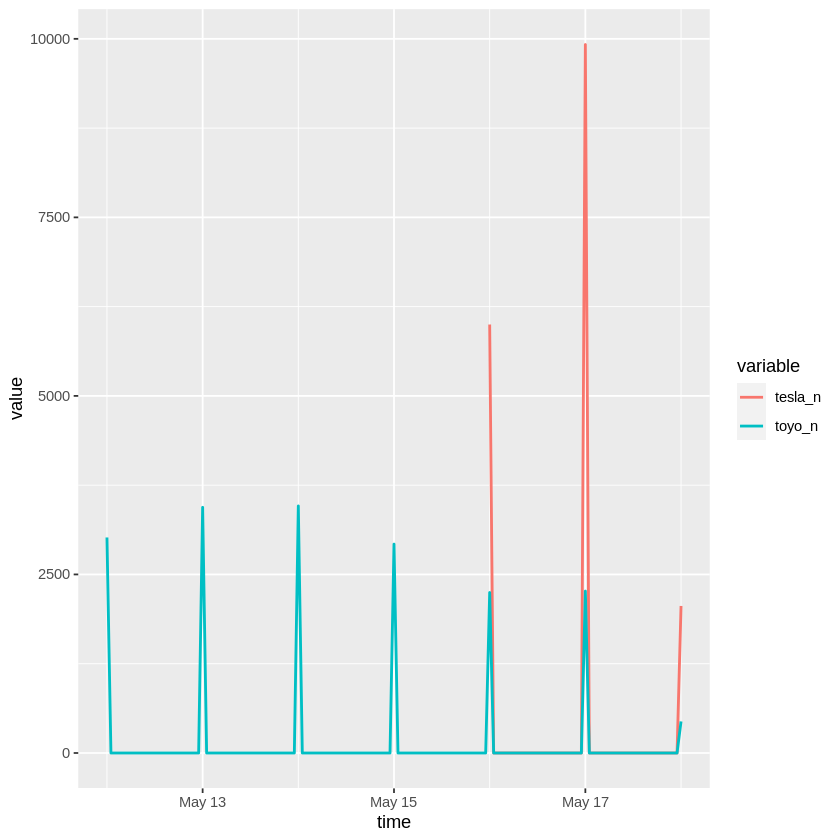

In [0]:
## Compare brand salience by plotting the frequency of tweets

# Plot frequency of tweets on Tesla and Toyota
ggplot(data = melt_df, aes(x = time, y = value, col = variable))+
  geom_line(lwd = 0.8)

## 4. Understand brand perception through text mining and by visualizing key terms

### 4a) Text mining by processing twitter text


In [0]:
# Extract tweet text from the Tesla dataset
twt_txt <- tesladf$text
head(twt_txt)

[1] @BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.                                                                                                                                                                                                                     
[2] @TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old.  He not only was an investor, he built the company.\n\nBTW, do you even know what “B shares” are?                                                                                                                                  
[3] @TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies.\n\nMusk is famously known to be an obsessed workaholic.  *That* has more to do with his success than anything else.\n\nYou sound petty, jealous and small.  When you accomplish what he accomplished, then you can bitch an moan.
[4] @Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move.\n\nBut if they do it will be because Musk thought it would be a positive.  Further, the new location will employ lots of new people.\n\nAlameda county isn’t the only place in the U.S. that needs jobs.                                         
[5] @jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing.\n\nDoesn’t seem to be an issue.                                                                       
[6] @jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof?  Are Alameda people more important than people elsewhere?\n\nTesla could help those people.                                                          
17896 Levels: -- Elon Musk (@elonmusk) May 9, 2020 Just a couple hours later is when Gonzalez tweeted "F*ck Elon Musk." #elonmusk #tesla https://t.co/XgAlbc1BXj ...

#### i) Remove URLs and characters other than letters

In [0]:
# Load the library
library(qdapRegex)


Attaching package: ‘qdapRegex’


The following object is masked from ‘package:ggplot2’:

    %+%


The following object is masked from ‘package:dplyr’:

    explain




In [0]:
# Remove URLs from the tweet text and view the output
twt_txt_url <- rm_twitter_url(twt_txt)

# View few rows of the dataframe
head(twt_txt_url)

[1] "@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99."                                                                                                                                                                                                             
[2] "@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?"                                                                                                                              
[3] "@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan."
[4] "@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs."                                        
[5] "@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue."                                                                  
[6] "@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people."

#### ii) Replace special characters, punctuations and numbers

In [0]:
# Replace special characters, punctuation, & numbers with spaces
twt_txt_chrs  <- gsub("[^A-Za-z]"," " , twt_txt_url)

# View text after replacing special characters, punctuation, & numbers
head(twt_txt_chrs)

[1] " BLKMDL   elonmusk  Tesla Oh sure ya showoff  Had to get the brand name fancy stuff  Mine is       "                                                                                                                                                                                                             
[2] " TrevSully  ThomboyD  elonmusk BTW  Musk bought into Tesla when it was one year old  He not only was an investor  he built the company  BTW  do you even know what  B shares  are "                                                                                                                              
[3] " TrevSully  ThomboyD  elonmusk He bought Tesla and built a handful of other companies  Musk is famously known to be an obsessed workaholic   That  has more to do with his success than anything else  You sound petty  jealous and small  When you accomplish what he accomplished  then you can bitch an moan "
[4] " Miss Violet      jamison casper  ThomboyD  elonmusk Tesla won t move  But if they do it will be because Musk thought it would be a positive  Further  the new location will employ lots of new people  Alameda county isn t the only place in the U S  that needs jobs "                                        
[5] " jamison casper  Miss Violet      ThomboyD  elonmusk I believe the county approved Tesla s COVID    Prevention plan  subject to some additional requirements  and will  with the police  enforce safe distancing  Doesn t seem to be an issue "                                                                  
[6] " jamison casper  Miss Violet      ThomboyD  elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof  Are Alameda people more important than people elsewhere  Tesla could help those people "

#### iii)  Build a corpus

In [0]:
# Load libraries
library(tm)
library(dplyr)

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




In [0]:
# Convert processed text to a text corpus and view output
twt_corpus <- twt_txt_chrs %>% 
                VectorSource() %>% 
                Corpus() 

# View the content column in the corpus
head(twt_corpus$content)

[1] " BLKMDL   elonmusk  Tesla Oh sure ya showoff  Had to get the brand name fancy stuff  Mine is       "                                                                                                                                                                                                             
[2] " TrevSully  ThomboyD  elonmusk BTW  Musk bought into Tesla when it was one year old  He not only was an investor  he built the company  BTW  do you even know what  B shares  are "                                                                                                                              
[3] " TrevSully  ThomboyD  elonmusk He bought Tesla and built a handful of other companies  Musk is famously known to be an obsessed workaholic   That  has more to do with his success than anything else  You sound petty  jealous and small  When you accomplish what he accomplished  then you can bitch an moan "
[4] " Miss Violet      jamison casper  ThomboyD  elonmusk Tesla won t move  But if they do it will be because Musk thought it would be a positive  Further  the new location will employ lots of new people  Alameda county isn t the only place in the U S  that needs jobs "                                        
[5] " jamison casper  Miss Violet      ThomboyD  elonmusk I believe the county approved Tesla s COVID    Prevention plan  subject to some additional requirements  and will  with the police  enforce safe distancing  Doesn t seem to be an issue "                                                                  
[6] " jamison casper  Miss Violet      ThomboyD  elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof  Are Alameda people more important than people elsewhere  Tesla could help those people "

#### iv)  Convert corpus to lowercase

In [0]:
# Convert the corpus to lowercase
twt_corpus_lwr <- tm_map(twt_corpus, tolower) 

# View the corpus after converting to lowercase
head(twt_corpus_lwr$content)

Warning message in tm_map.SimpleCorpus(twt_corpus, tolower):
“transformation drops documents”


[1] " blkmdl   elonmusk  tesla oh sure ya showoff  had to get the brand name fancy stuff  mine is       "                                                                                                                                                                                                             
[2] " trevsully  thomboyd  elonmusk btw  musk bought into tesla when it was one year old  he not only was an investor  he built the company  btw  do you even know what  b shares  are "                                                                                                                              
[3] " trevsully  thomboyd  elonmusk he bought tesla and built a handful of other companies  musk is famously known to be an obsessed workaholic   that  has more to do with his success than anything else  you sound petty  jealous and small  when you accomplish what he accomplished  then you can bitch an moan "
[4] " miss violet      jamison casper  thomboyd  elonmusk tesla won t move  but if they do it will be because musk thought it would be a positive  further  the new location will employ lots of new people  alameda county isn t the only place in the u s  that needs jobs "                                        
[5] " jamison casper  miss violet      thomboyd  elonmusk i believe the county approved tesla s covid    prevention plan  subject to some additional requirements  and will  with the police  enforce safe distancing  doesn t seem to be an issue "                                                                  
[6] " jamison casper  miss violet      thomboyd  elonmusk what about other areas of the country where people are struggling and unemployment is going through the roof  are alameda people more important than people elsewhere  tesla could help those people "

#### v) Remove stop words from the Corpus

In [0]:
# Remove English stop words from the corpus and view the corpus
twt_corpus_stpwd <- tm_map(twt_corpus_lwr, removeWords, stopwords("english"))

# View the content column
head(twt_corpus_stpwd$content)

Warning message in tm_map.SimpleCorpus(twt_corpus_lwr, removeWords, stopwords("english")):
“transformation drops documents”


[1] " blkmdl   elonmusk  tesla oh sure ya showoff    get  brand name fancy stuff  mine        "                                                                                                                                            
[2] " trevsully  thomboyd  elonmusk btw  musk bought  tesla    one year old       investor   built  company  btw    even know   b shares   "                                                                                               
[3] " trevsully  thomboyd  elonmusk  bought tesla  built  handful   companies  musk  famously known    obsessed workaholic           success  anything else   sound petty  jealous  small    accomplish   accomplished    can bitch  moan "
[4] " miss violet      jamison casper  thomboyd  elonmusk tesla won t move       will   musk thought     positive     new location will employ lots  new people  alameda county isn t   place   u s   needs jobs "                         
[5] " jamison casper  miss violet      thomboyd  elonmusk  believe  county approved tesla s covid    prevention plan  subject   additional requirements   will    police  enforce safe distancing  doesn t seem    issue "                 
[6] " jamison casper  miss violet      thomboyd  elonmusk    areas   country  people  struggling  unemployment  going   roof   alameda people  important  people elsewhere  tesla  help  people "

#### vi) Remove additional spaces from the Corpus

In [0]:
# Remove additional spaces from the corpus
twt_corpus_final <- tm_map(twt_corpus_stpwd, stripWhitespace)

# View the text corpus after removing spaces
head(twt_corpus_final$content)

Warning message in tm_map.SimpleCorpus(twt_corpus_stpwd, stripWhitespace):
“transformation drops documents”


[1] " blkmdl elonmusk tesla oh sure ya showoff get brand name fancy stuff mine "                                                                                                                       
[2] " trevsully thomboyd elonmusk btw musk bought tesla one year old investor built company btw even know b shares "                                                                                   
[3] " trevsully thomboyd elonmusk bought tesla built handful companies musk famously known obsessed workaholic success anything else sound petty jealous small accomplish accomplished can bitch moan "
[4] " miss violet jamison casper thomboyd elonmusk tesla won t move will musk thought positive new location will employ lots new people alameda county isn t place u s needs jobs "                    
[5] " jamison casper miss violet thomboyd elonmusk believe county approved tesla s covid prevention plan subject additional requirements will police enforce safe distancing doesn t seem issue "      
[6] " jamison casper miss violet thomboyd elonmusk areas country people struggling unemployment going roof alameda people important people elsewhere tesla help people "

#### vii) Remove custom stop words from the Corpus

In [0]:
# Load the library qdap
library(qdap)

Loading required package: qdapDictionaries

Loading required package: qdapTools


Attaching package: ‘qdapTools’


The following object is masked from ‘package:dplyr’:

    id


Loading required package: RColorBrewer


Attaching package: ‘qdap’


The following objects are masked from ‘package:tm’:

    as.DocumentTermMatrix, as.TermDocumentMatrix


The following object is masked from ‘package:NLP’:

    ngrams


The following object is masked from ‘package:reshape’:

    condense


The following object is masked from ‘package:dplyr’:

    %>%


The following object is masked from ‘package:rtweet’:

    %>%


The following object is masked from ‘package:base’:

    Filter




In [0]:
# Extract term frequencies for top 60 words in the Corpus
termfreq  <-  freq_terms(twt_corpus_final, 60)

# View the output
termfreq

,WORD,FREQ
,<chr>,<dbl>
24925,tesla,19035
21723,s,5543
7873,elonmusk,4791
24513,t,2851
27825,will,1709
7863,elon,1583
3587,can,1569
14493,like,1538
13362,just,1389


In [0]:
# Create a vector of custom stop words
custom_stopwds <- c("tesla", "s", "t", "will", "elon", "can", "like", 
				"just", "musk", "one", "m",  "get", "now", "cars", "amp", 
                "re", "go", "even", "via")

In [0]:
# Remove custom stop words and create a refined corpus
corp_refined <- tm_map(twt_corpus_final,removeWords, custom_stopwds)

# View the text corpus after removing custom stop words
head(twt_corpus_final$content)

Warning message in tm_map.SimpleCorpus(twt_corpus_final, removeWords, custom_stopwds):
“transformation drops documents”


[1] " blkmdl elonmusk tesla oh sure ya showoff get brand name fancy stuff mine "                                                                                                                       
[2] " trevsully thomboyd elonmusk btw musk bought tesla one year old investor built company btw even know b shares "                                                                                   
[3] " trevsully thomboyd elonmusk bought tesla built handful companies musk famously known obsessed workaholic success anything else sound petty jealous small accomplish accomplished can bitch moan "
[4] " miss violet jamison casper thomboyd elonmusk tesla won t move will musk thought positive new location will employ lots new people alameda county isn t place u s needs jobs "                    
[5] " jamison casper miss violet thomboyd elonmusk believe county approved tesla s covid prevention plan subject additional requirements will police enforce safe distancing doesn t seem issue "      
[6] " jamison casper miss violet thomboyd elonmusk areas country people struggling unemployment going roof alameda people important people elsewhere tesla help people "

In [0]:
# Extract term frequencies for the top 60 words
termfreq_clean <- freq_terms(corp_refined, 60)

# View the output
termfreq_clean

,WORD,FREQ
,<chr>,<dbl>
7869,elonmusk,4791
3669,car,1256
16253,model,1082
17083,new,961
7076,don,902
23378,spacex,894
18619,people,882
3417,buy,766
25390,think,751


## 4. Understand brand perception through text mining and by visualizing key terms

### 4b) Understand brand perception by visualizing key terms

#### i) Visualize popular terms with bar plots

In [0]:
# Extract term frequencies for the top 10 words
termfreq_10w <- freq_terms(corp_refined, 10)
termfreq_10w

,WORD,FREQ
,<chr>,<dbl>
7869,elonmusk,4791
3669,car,1256
16253,model,1082
17083,new,961
7076,don,902
23378,spacex,894
18619,people,882
3417,buy,766
25390,think,751


In [0]:
# Identify terms with more than 60 counts from the top 10 list
term60 <- subset(termfreq_10w, FREQ > 60)
term60

,WORD,FREQ
,<chr>,<dbl>
7869,elonmusk,4791
3669,car,1256
16253,model,1082
17083,new,961
7076,don,902
23378,spacex,894
18619,people,882
3417,buy,766
25390,think,751


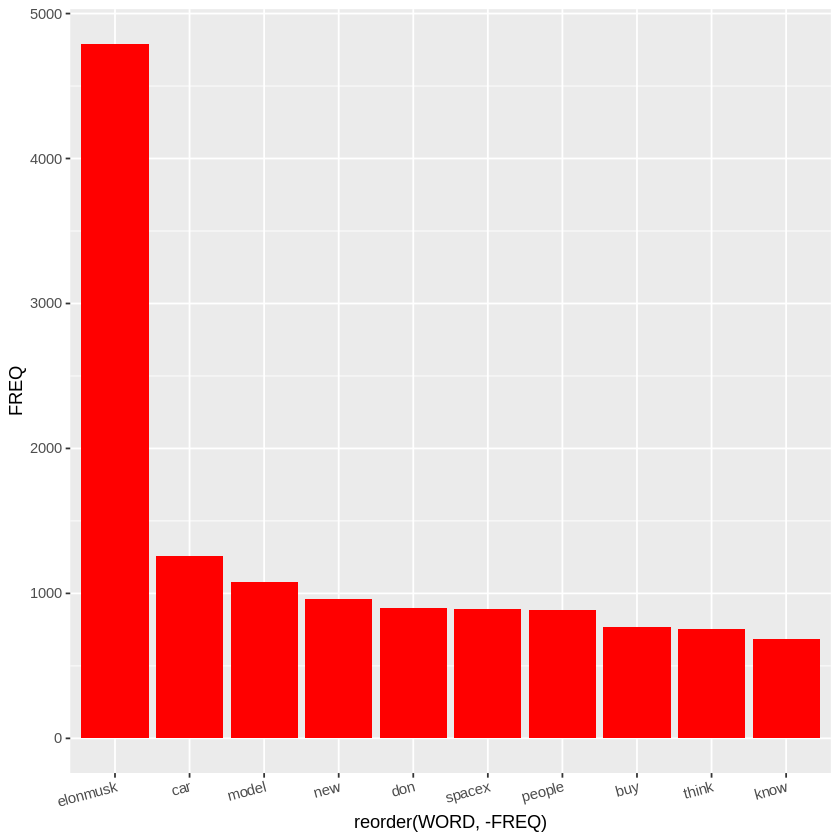

In [0]:
# Create a bar plot using terms with more than 60 counts
ggplot(term60, aes(x = reorder(WORD, -FREQ), y = FREQ)) + 
		geom_bar(stat = "identity", fill = "red") + 
		theme(axis.text.x = element_text(angle = 15, hjust = 1))

In [0]:
# Extract term frequencies for the top 25 words
termfreq_25w <- freq_terms(corp_refined, 25)
termfreq_25w

# Identify terms with more than 50 counts from the top 25 list
term50 <- subset(termfreq_25w, FREQ > 50)

,WORD,FREQ
,<chr>,<dbl>
7869,elonmusk,4791
3669,car,1256
16253,model,1082
17083,new,961
7076,don,902
23378,spacex,894
18619,people,882
3417,buy,766
25390,think,751


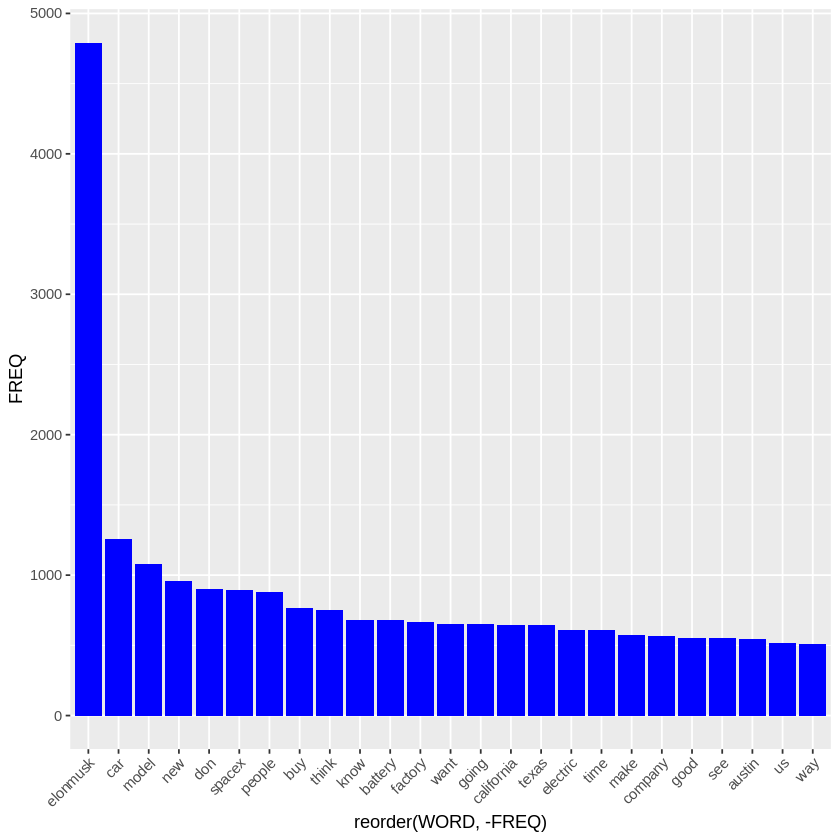

In [0]:
# Create a bar plot using terms with more than 50 counts
ggplot(term50, aes(x = reorder(WORD, -FREQ), y = FREQ)) + 
		geom_bar(stat = "identity", fill="blue") + 
		theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### ii) Visualize popular terms with word clouds


In [0]:
# Load libraries
library(wordcloud)
library(RColorBrewer)

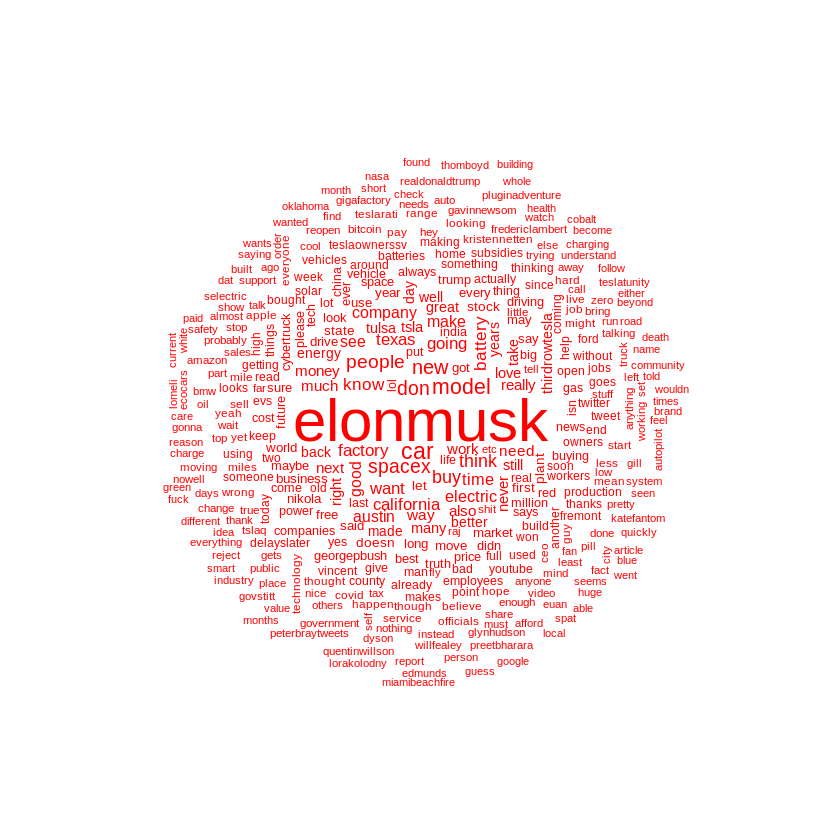

In [0]:
# Create a word cloud in red with min frequency of 100
wordcloud(corp_refined, min.freq = 100, colors = "red", 
          scale = c(3,0.5),random.order = FALSE)

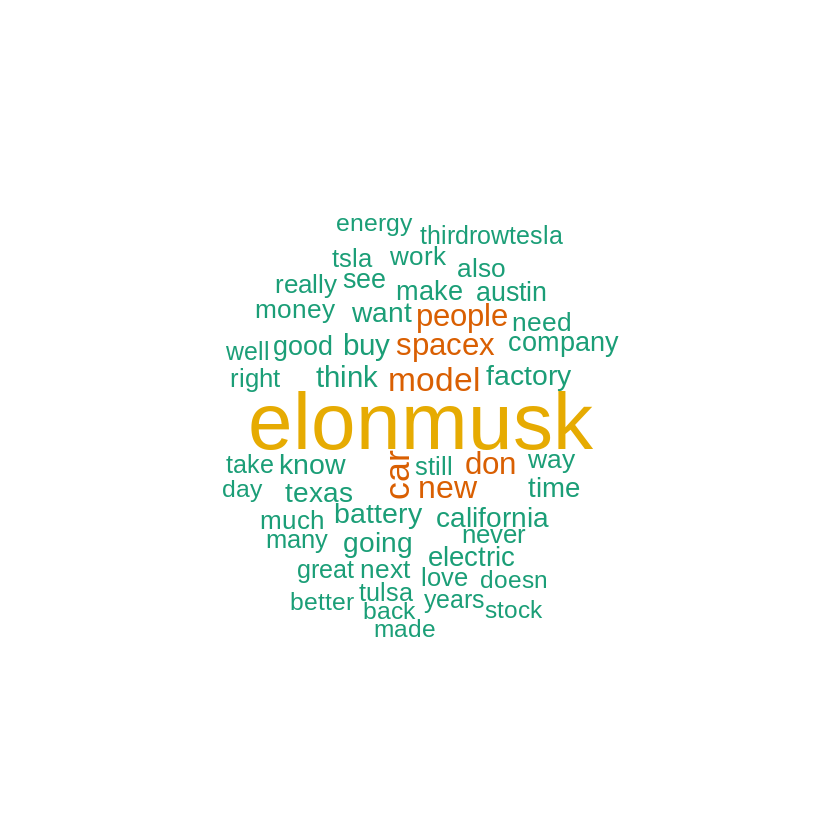

In [0]:
# Create word cloud with 6 colors and max 50 words
wordcloud(corp_refined, max.words = 50, 
          colors = brewer.pal(6, "Dark2"), 
          scale=c(4,1), random.order = FALSE)

## 5.	Sentiment analysis of tweets to understand customer's feelings and sentiments about a brand

In [0]:
# Load a smaller dataset for tesla
tesladf_small <- read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/tesla_small.csv?raw=true", stringsAsFactors=FALSE)

In [0]:
# Explore the tweet dataframe
dim(tesladf_small)
head(tesladf_small)

[1] 500  90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,⋯,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
1,1.423882e+09,1.262695e+18,2020-05-19T10:43:52Z,PayamSaderi,"Yesterday, Tesla CEO Elon Musk sent a tweet: “Take the red pill,” it read, and included a rose emoji. Shortly after that, Ivanka Trump retweeted it and added “Taken!”. Then, 'Matrix' co-creator Lilly Wachowski weighed in. Her reply? “Fuck both of you.” https://t.co/9EPLdDHuTj",Twitter Web App,140,NA,NA,,⋯,14526,15886,2013-05-12T19:27:06Z,FALSE,https://t.co/HLktm4kvkG,http://saderi.com,NA,https://pbs.twimg.com/profile_banners/1423881943/1413862714,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/865112558017028096/QbSYq4Z1_normal.jpg
2,2.996161e+09,1.262695e+18,2020-05-19T10:43:52Z,agusnox,@QTRResearch O'Leary used to like companies that are cash generating. Definitively not Tesla,Twitter Web App,79,1.262695e+18,1.469604e+09,QTRResearch,⋯,34458,50835,2015-01-24T17:01:53Z,FALSE,https://t.co/g5myTMfqFf,http://www.argenox.com,NA,https://pbs.twimg.com/profile_banners/2996161037/1578077829,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1240088633568346114/APbZkOqM_normal.jpg
3,2.996161e+09,1.262686e+18,2020-05-19T10:08:07Z,agusnox,"@montana_skeptic Exactly as we said: The big manufacturers were biding their time until the fines arrived, while Tesla was claiming it was dominant in an empty field. Like a little kid saying he beat Michael Jordan Now Jordan is playing for keeps https://t.co/87gWESowOU",Twitter Web App,231,1.262685e+18,1.203353e+18,montana_skeptic,⋯,34458,50835,2015-01-24T17:01:53Z,FALSE,https://t.co/g5myTMfqFf,http://www.argenox.com,NA,https://pbs.twimg.com/profile_banners/2996161037/1578077829,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1240088633568346114/APbZkOqM_normal.jpg
4,4.123313e+07,1.262695e+18,2020-05-19T10:43:44Z,hscholtz,Why these cars are Tesla’s biggest threat https://t.co/YzpwZmieEs,Twitter for iPhone,86,NA,NA,,⋯,148326,14364,2009-05-19T22:52:04Z,FALSE,https://t.co/23PELe6VSz,http://www.cmdlt.edu.ve,NA,,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/579116843081842688/xkiWH-yu_normal.jpg
5,3.846028e+08,1.262695e+18,2020-05-19T10:43:42Z,koolbash4,Tesla Full Self-Driving option cost rises by ~$1000 worldwide on July 1st. Order a Tesla online in less than 2 minutes at https://t.co/qJm9uPBCX5,Twitter for Android,140,NA,NA,,⋯,15110,10815,2011-10-04T00:18:03Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/384602781/1580819431,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1245277794986332160/GlfHwNJI_normal.jpg
6,1.192205e+18,1.262695e+18,2020-05-19T10:43:39Z,PinkEle31705153,"@FullyChargedShw @FullyChargedDan @bobbyllew @maddiemoate @Tesla @FlitBike @RaleighBikes_UK @ManMadeMoon Idle speculation on my part but should Austin TX 🐝 confirmed, I'm wondering how many may choose 2 up sticks &amp; decamp from Houston &amp; other fossil fuel based areas 2 clean, green ones for health of themselves &amp; their families.",Twitter Web App,236,1.262691e+18,7.709332e+17,FullyChargedShw,⋯,1040,1863,2019-11-06T22:21:49Z,FALSE,,,NA,,,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png


In [0]:
# Load the library syuzhet
library(syuzhet)

#### Extract sentiment scores

In [0]:
# Perform sentiment analysis for tweets on `Climate change` 
sa.value <- get_nrc_sentiment(tesladf_small$text)

# View the sentiment scores
head(sa.value, 10)

Warning message:
“`filter_()` is deprecated as of dplyr 0.7.0.
Please use `filter()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`group_by_()` is deprecated as of dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,0,1,1,0,2
2,1,1,0,1,1,0,0,1,0,1
3,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,2
6,0,0,0,1,2,1,0,3,1,3
7,0,1,0,0,0,0,1,1,0,2
8,1,1,0,1,1,0,0,1,1,1
9,0,1,0,0,0,0,1,1,0,2


#### Perform sentiment analysis


In [0]:
# Calculate sum of sentiment scores
score <- colSums(sa.value[,])

# Convert the sum of scores to a dataframe
score_df <- data.frame(score)

# View the dataframe
head(score_df)

,score
,<dbl>
anger,146
anticipation,270
disgust,67
fear,149
joy,154
sadness,106


In [0]:
# Convert row names into 'sentiment' column and combine with sentiment scores
score_df2 <- cbind(sentiment = row.names(score_df),  
				  score_df, row.names = NULL)

# View the dataframe
print(score_df2)

      sentiment score
1         anger   146
2  anticipation   270
3       disgust    67
4          fear   149
5           joy   154
6       sadness   106
7      surprise   160
8         trust   330
9      negative   272
10     positive   727


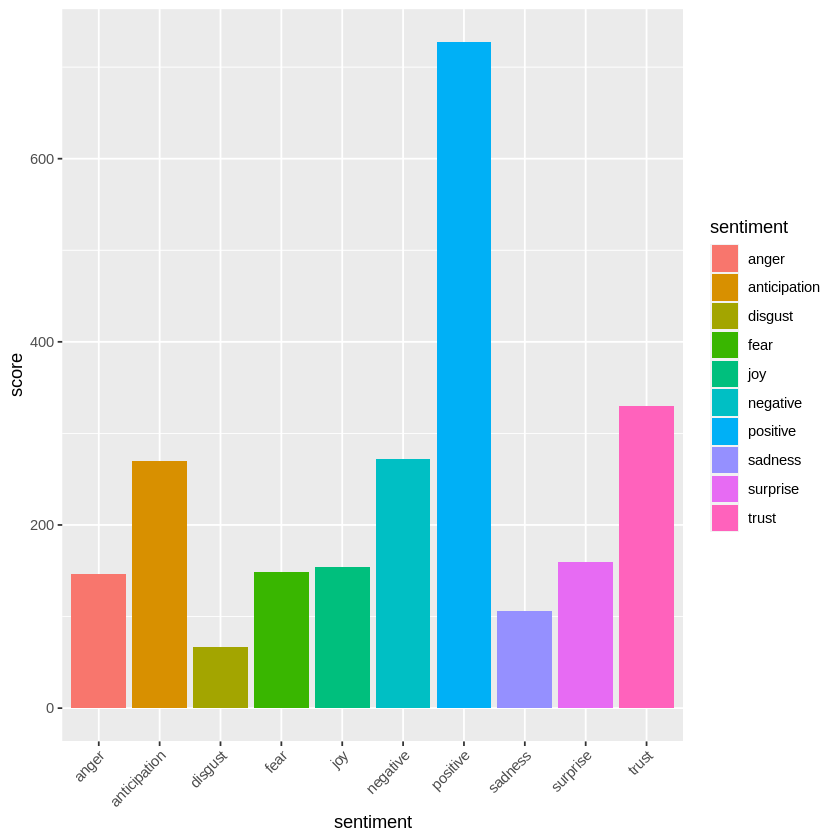

In [0]:
# Plot the sentiment scores
ggplot(data = score_df2, aes(x = sentiment, y = score, fill = sentiment)) +
  	   geom_bar(stat = "identity") +
       theme(axis.text.x = element_text(angle = 45, hjust = 1))

## 6.	Visualize brand presence by plotting tweets on 'electric car' on the map

In [0]:
# Extract tweets on 'electric car' from Twitter
#tweets_car = search_tweets("electric car", include_rts = TRUE, n = 18000)
#fwrite(tweets_car, "tweets_car.csv")

# Load tweets in csv format into a dataframe
tweets_car <- read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/tweets_car.csv?raw=true")

In [0]:
# Explore the tweet dataframe
dim(tweets_car)
head(tweets_car)

[1] 12925    90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,3406918337,1.269941e+18,2020-06-08T10:35:27Z,SpecialistSEAT,Looking to the #future of urban driving. Your favourite city car has just gone #electric. #Follow the link to place your SEAT #Mii Electric order. https://t.co/Uv5MbLlMFh https://t.co/ljpZzrRZZT,CrowdControlHQ,170,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg
2,3406918337,1.267404e+18,2020-06-01T10:35:18Z,SpecialistSEAT,Looking to the #future of urban driving. Your favourite city car has just gone #electric. #Follow the link to place your SEAT #Mii Electric order. https://t.co/JHoGAgjydp https://t.co/nyzJ9vSpEm,CrowdControlHQ,170,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg
3,3406918337,1.268127e+18,2020-06-03T10:26:49Z,SpecialistSEAT,"#Change looks good. The new SEAT #Mii electric was voted WhatCar? 'Small Electric Car Of The Year under £25,000'. #Follow the link to learn more about its unique features. https://t.co/4Jnld6RZgr https://t.co/ags6br4nqY",CrowdControlHQ,195,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg
4,3406918337,1.268129e+18,2020-06-03T10:35:59Z,SpecialistSEAT,Looking to the #future of urban driving. Your favourite city car has just gone #electric. #Follow the link to place your SEAT #Mii Electric order. https://t.co/2Eem5rXwqH https://t.co/6cwci9q4gl,CrowdControlHQ,170,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg
5,3406918337,1.268854e+18,2020-06-05T10:36:18Z,SpecialistSEAT,Looking to the #future of urban driving. Your favourite city car has just gone #electric. #Follow the link to place your SEAT #Mii Electric order. https://t.co/RMSynH6Ol7 https://t.co/XS3rHa14Ao,CrowdControlHQ,170,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg
6,3406918337,1.267402e+18,2020-06-01T10:26:27Z,SpecialistSEAT,"#Change looks good. The new SEAT #Mii electric was voted WhatCar? 'Small Electric Car Of The Year under £25,000'. #Follow the link to learn more about its unique features. https://t.co/sol38eYGUJ https://t.co/EBX0NVqPeo",CrowdControlHQ,195,NA,NA,,⋯,6296,17,2015-08-07T08:26:08Z,FALSE,http://t.co/tFicJcM3H1,http://www.specialistcarsseat.co.uk,NA,https://pbs.twimg.com/profile_banners/3406918337/1485964805,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1247111588374552576/VmYBNRGh_normal.jpg


In [0]:
# Extract geo-coordinates data to append as new columns
car_coord <- lat_lng(tweets_car)

# View the columns with geo-coordinates for first 20 tweets
head(car_coord[c("lat","lng")], 20)

lat,lng
<dbl>,<dbl>
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA
NA,NA


In [0]:
# Omit rows with missing geo-coordinates in the data frame
car_geo <- na.omit(car_coord[,c("lat", "lng")])

# View the output
head(car_geo)

lat,lng
<dbl>,<dbl>


In [0]:
# Load the library maps
library(maps)

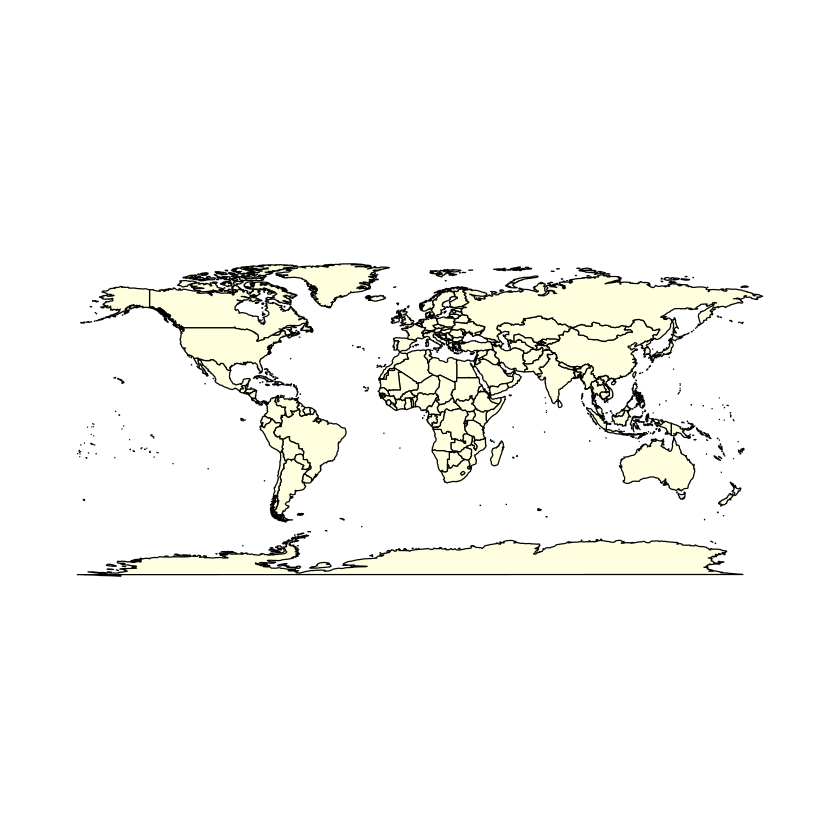

In [0]:
# Plot longitude and latitude values of tweets on the world map
map(database = "world", fill = TRUE, col = "light yellow")
with(car_geo, points(lng, lat, pch = 20, cex = 1, col = 'blue'))